## Procedure

1. Clean and transform data
2. **Exploratory Data Analysis (EDA)**
3. Modeling & evaluation
4. Conclusion
5. Clean code with classes & functions

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.externals import joblib
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../work/data/device_failure.csv', engine='python')
features = joblib.load('../work/data/features')
features_transformed = joblib.load('../work/data/features_transformed')
target = joblib.load('../work/data/target')

## Correlation matrix

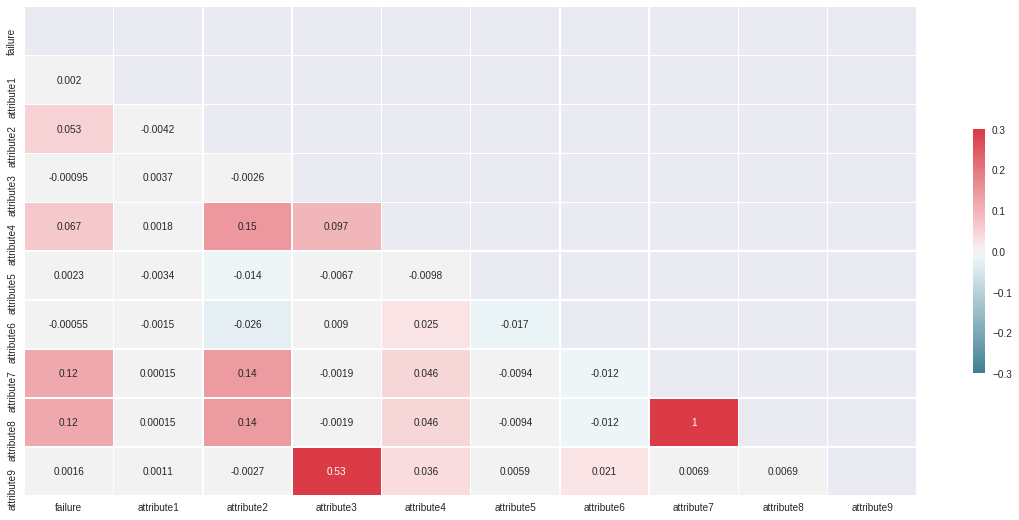

In [6]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax,
            annot=True)

## Make an ATA cluster
$$\hat\beta = (A^TA)^{-1}A^Ty$$

(-0.5, 0.5)

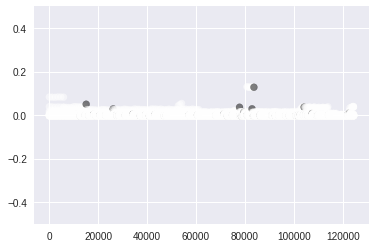

In [14]:
A = features
ATA = A.T.dot(A)
beta = inv(ATA).dot(A.T).dot(target)
indep = range(len(A))
plt.scatter(indep, A.dot(beta), c=target, alpha=0.5)
plt.ylim(-.5,.5)

## PCA
Use the first two principal components to visualize the data

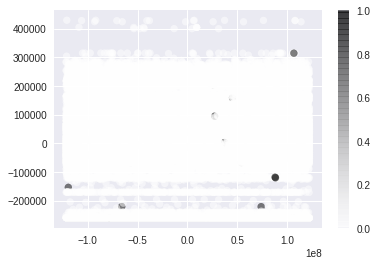

In [3]:
# Try PCA on non-transformed data 

pca = PCA()
features_pca = pca.fit_transform(features)
plt.scatter(features_pca[:,0], features_pca[:,1], c=target, alpha=.5)
plt.colorbar()

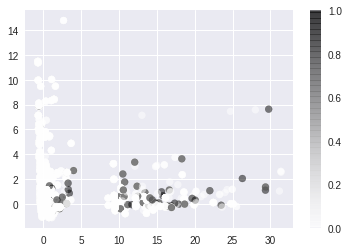

In [4]:
# Try PCA on transformed data

pca = PCA()
features_pca = pca.fit_transform(features_transformed)
plt.scatter(features_pca[:,0], features_pca[:,1], c=target, alpha=.5)
plt.colorbar()

In [10]:
pca.explained_variance_ratio_[:5]

array([ 0.13258631,  0.10384451,  0.07315312,  0.07306768,  0.07299079])

In [11]:
# 11 components can account for 90% of the variance

np.where(np.cumsum(pca.explained_variance_ratio_) > .9)[0][0]

11

In [12]:
len(pca.explained_variance_ratio_)

16

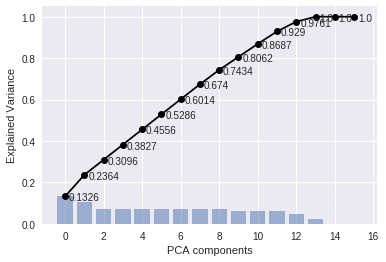

In [15]:
# create an x-axis variable for each pca component
x = np.arange(16)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()